## DESAFÍO 03

## **Análisis de las Poblaciones de Peces Raros en Varios Países**

### Summary
Este proyecto de análisis de datos se enfoca en explorar las dinámicas de las poblaciones de peces raros en diferentes países, sin embargo, se limita a dos años de observación (por ejemplo, 2022 y 2023). El objetivo principal es comprender cómo factores como la biomasa, densidad, la familia y especie de los peces influyen en el estado de estas poblaciones y en la gestión de zonas de acceso.

### Introducción 
La conservación y gestión de poblaciones de peces raros es esencial para la biodiversidad y la sostenibilidad de la pesca. Este proyecto busca arrojar luz sobre la relación entre diversas variables, incluyendo biomasa, densidad, familia y especie de los peces, y cómo estos factores impactan la gestión de poblaciones en diferentes países.

**Contexto comercial**
En el sector de la gestión de recursos naturales y la conservación marina, es fundamental contar con información precisa y actualizada sobre las poblaciones de peces, especialmente en lo que respecta a especies raras y en peligro de extinción. Este análisis se centra en un conjunto de datos valioso y detallado, que proporciona información sobre poblaciones de peces raros en diferentes países y regiones.

**Problema comercial**
El problema comercial en cuestión se centra en la gestión y conservación de las poblaciones de peces raros en diferentes regiones y países. A pesar de la importancia crítica de estas especies para la biodiversidad marina y la sostenibilidad de la pesca, existen desafíos significativos que requieren atención y soluciones efectivas.

Los aspectos clave a monitorear son:
Deterioro de las Poblaciones de Peces Raros
Necesidad de Gestión Sostenible
Desafíos de Monitoreo y Toma de Decisiones


### Objetivos:

* Analizar la relación entre la biomasa y densidad de peces raros entre los años 2013 al 2023 para comprender las tendencias en el estado de estas poblaciones.
* Identificar factores clave que influyen en la gestión de zonas de acceso mediante el análisis de variables como la biomasa, densidad y la especificación de las familias y especies.
* Investigar cómo las características de las familias y especies de peces raros pueden afectar su capacidad de adaptación y supervivencia en diferentes contextos geográficos.

### Hipótesis:

Biomasa y Densidad de Peces:

H0: La biomasa y densidad de peces raros no están correlacionadas con el estado de las poblaciones en los años de observación.
H1: La biomasa y densidad de peces raros están correlacionadas significativamente con el estado de las poblaciones en los años de observación.

Gestión de Zonas de Acceso:
H0: No existe una relación significativa entre la biomasa, densidad y la especificación de las familias y especies con la gestión de zonas de acceso.
H1: La biomasa, densidad y la especificación de las familias y especies están relacionadas significativamente con la gestión de zonas de acceso.

Relación entre la profundidad del agua y la cantidad de peces encontrados:
H0: No hay una correlación significativa entre la profundidad del agua y la cantidad de peces encontrados.
H1: Existe una correlación significativa entre la profundidad del agua y la cantidad de peces encontrados.

Variación por especie a lo largo de los años:
H0: La cantidad de peces de cada especie no varía significativamente a lo largo de los años en los datos disponibles.
H1: La cantidad de peces de al menos una especie varía significativamente a lo largo de los años en los datos disponibles.


In [2]:
import pandas as pd

url ='C:\\Users\\52444\\Desktop\\Data Science\\DataScienceCoder\\Data Sets\\fish-surveys-all.csv'
dfFISH = pd.read_csv(url)


dfFISH.head()

C:\Users\52444\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (1,3,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,country,survey_date,ma_name,reef_zone,location_name,location_status,lat,lon,transect_no,water_depth,...,density_ind_ha,length,size_class,biomass_kg_ha,a,b,family,level1_name,level2_name,year
0,Mozambique,2021-01-29,Sanculo,back,Ilha-sede1,Reserve,-15.05441,40.72473,1,7.0,...,240.0,2.5,0-5,0.221405,0.070307,2.809417,Pomacentridae,Nampula,Ilha de Mocambique,2020
1,Mozambique,2020-12-23,Memba-sede,back,Mecumbo,Managed Access,-14.20380,40.54742,2,10.0,...,40.0,25.5,21-30,10.261146,0.019597,2.927000,Siganidae,Nampula,Memba,2020
2,Mozambique,2020-12-23,Memba-sede,back,Mecumbo,Managed Access,-14.20380,40.54742,2,10.0,...,40.0,8.0,6-10,0.365670,0.017855,3.000000,Pseudochromidae,Nampula,Memba,2020
3,Mozambique,2020-12-23,Memba-sede,back,Mecumbo,Managed Access,-14.20380,40.54742,1,10.0,...,640.0,15.5,11-20,61.473739,0.034754,2.891215,Lutjanidae,Nampula,Memba,2020
4,Mozambique,2020-12-22,Memba-sede,back,Mecumbo,Managed Access,-14.15724,40.56409,2,3.0,...,14000.0,2.5,0-5,4.009509,0.019597,2.927000,Siganidae,Nampula,Memba,2020


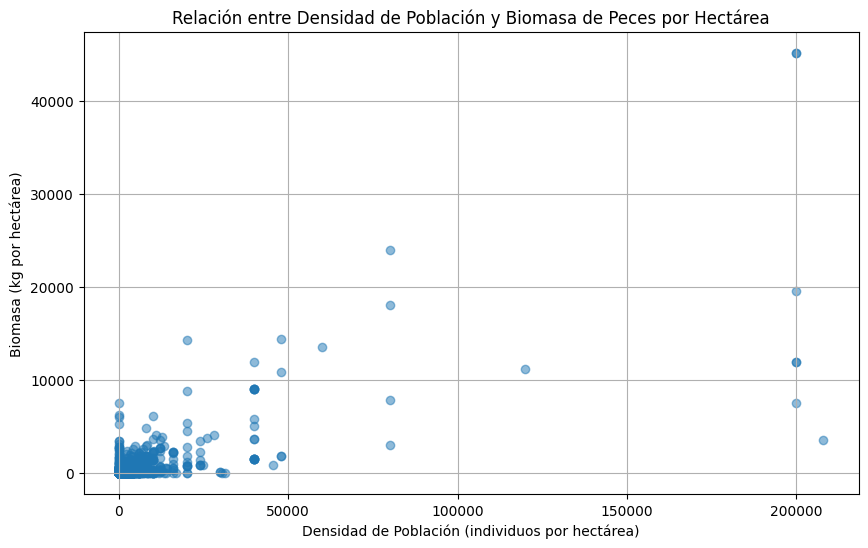

In [19]:
import matplotlib.pyplot as plt

density_data = dfFISH['density_ind_ha']
biomass_data = dfFISH['biomass_kg_ha']

plt.figure(figsize=(10, 6))
plt.scatter(density_data, biomass_data, alpha=0.5)  # 'alpha' ajusta la transparencia de los puntos
plt.title('Relación entre Densidad de Población y Biomasa de Peces por Hectárea')
plt.xlabel('Densidad de Población (individuos por hectárea)')
plt.ylabel('Biomasa (kg por hectárea)')
plt.grid(True)

plt.show()


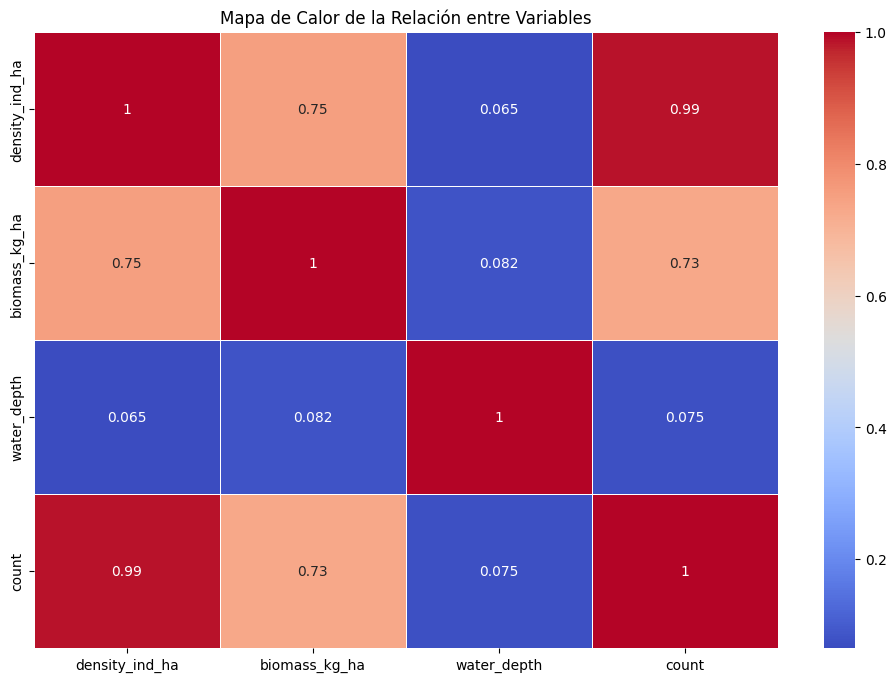

In [20]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(dfFISH, left_on='name', right_on='country', how='inner')

variables_of_interest = ['density_ind_ha','biomass_kg_ha', 'water_depth', 'count', 'reef_slope']

correlation_matrix = merged_data[variables_of_interest].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Relación entre Variables')
plt.show()

In [11]:
import pandas as pd

#Quiero saber cuántos datos NaN tengo en mi df y cuántos me quedan al eliminar estas filas.
# Copia el DataFrame original para mantener los datos originales intactos
dfFISH_copia = dfFISH.copy()

# Elimina las filas con NaN en las columnas estratégicas (por ejemplo, biomass_kg_ha, density_ind_ha)
columnas_estrategicas = ['biomass_kg_ha', 'density_ind_ha']
dfFISH_copia = dfFISH_copia.dropna(subset=columnas_estrategicas)

# Calcula el número de filas eliminadas
filas_eliminadas = len(dfFISH) - len(dfFISH_copia)

# Muestra el número de filas eliminadas
print(f"Número de filas eliminadas: {filas_eliminadas}")

# Calcula el número de filas restantes en el DataFrame dfFISH_copia
filas_restantes = len(dfFISH_copia)

# Muestra el número de filas restantes
print(f"Número de filas restantes: {filas_restantes}")




Número de filas eliminadas: 11628
Número de filas restantes: 149979


In [12]:
# Calcula la matriz de correlación de Pearson
matriz_correlacion = dfFISH_copia[['biomass_kg_ha', 'density_ind_ha', 'count']].corr()

from scipy.stats import pearsonr

# Calcula el coeficiente de correlación y p-valor entre biomasa y count
coeficiente_biomasa_count, p_valor_biomasa_count = pearsonr(dfFISH_copia['biomass_kg_ha'], dfFISH_copia['count'])

# Calcula el coeficiente de correlación y p-valor entre densidad y count
coeficiente_densidad_count, p_valor_densidad_count = pearsonr(dfFISH_copia['density_ind_ha'], dfFISH_copia['count'])

# Imprime los coeficientes de correlación y p-valores
print(f"Coeficiente de correlación entre biomasa y count: {coeficiente_biomasa_count}")
print(f"P-valor entre biomasa y count: {p_valor_biomasa_count}")
print(f"Coeficiente de correlación entre densidad y count: {coeficiente_densidad_count}")
print(f"P-valor entre densidad y count: {p_valor_densidad_count}")


Coeficiente de correlación entre biomasa y count: 0.731526595511798
P-valor entre biomasa y count: 0.0
Coeficiente de correlación entre densidad y count: 0.988858302832645
P-valor entre densidad y count: 0.0


### INTERPRETACIÓN

**Entre biomasa y count:**

El coeficiente de correlación (0.7315) es positivo, lo que sugiere una correlación positiva.
El p-valor (0.0) es menor que cualquier nivel de significancia común (como 0.05), lo que indica una correlación significativa entre biomasa y count.
***** NO CONFÍO NI TENGO CERTEZA DE QUE ESTE VALOR ESTE CORRECTO, TENGO QUE HACER MÁS PRUEBAS PARA VERIFICARLO

**Entre densidad y count:**

El coeficiente de correlación (0.9889) es positivo, lo que sugiere una correlación positiva muy fuerte.
El p-valor (0.0) también es menor que cualquier nivel de significancia común, lo que indica una correlación significativa y muy fuerte entre densidad y count.
***** NO CONFÍO NI TENGO CERTEZA DE QUE ESTE VALOR ESTE CORRECTO, TENGO QUE HACER MÁS PRUEBAS PARA VERIFICARLO

En base a estos resultados, puedes concluir que tanto la biomasa como la densidad están significativamente correlacionadas con el estado de las poblaciones (count) de peces raros en los años de observación en tu conjunto de datos. Esto significa que existe una relación positiva entre la biomasa, la densidad y la cantidad de peces encontrados, lo que sugiere que un aumento en la biomasa o la densidad puede estar relacionado con un aumento en el recuento de peces raros.


In [13]:
#Hipótesis 2
# Copia el DataFrame original para mantener los datos originales intactos
dfFISH_copia2 = dfFISH.copy()

# Elimina filas con NaN en las columnas biomasa, densidad e location_status
columnas_estrategicas2 = ['biomass_kg_ha', 'density_ind_ha', 'location_status']
dfFISH_copia2 = dfFISH_copia2.dropna(subset=columnas_estrategicas2)

from scipy.stats import chi2_contingency

# Crea una tabla de contingencia para las variables biomasa y location_status
tabla_contingencia = pd.crosstab(dfFISH_copia2['biomass_kg_ha'], dfFISH_copia2['location_status'])

# Realiza la prueba de chi-cuadrado para evaluar la independencia entre las variables
chi2, p_valor, _, _ = chi2_contingency(tabla_contingencia)

# Imprime el p-valor
print(f"P-valor de la prueba de chi-cuadrado: {p_valor}")



P-valor de la prueba de chi-cuadrado: 8.167007339140857e-48


### INTERPRETACIÓN

El p-valor es prácticamente cero (mucho menor que cualquier nivel de significancia común, como 0.05), se puede rechazar la hipótesis nula (H0). Esto sugiere que existe una relación significativa entre al menos una de las variables (biomasa o densidad) y la gestión de zonas de acceso (location_status). En otras palabras, la biomasa, la densidad o ambas pueden tener un impacto en la gestión de zonas de acceso en tu conjunto de datos.

In [15]:
#Hipótesis 3

from scipy.stats import pearsonr

# Elimina filas con NaN o infinitos en las columnas relevantes
columnas_relevantes = ['water_depth', 'count']
dfFISH_copia2 = dfFISH_copia2.dropna(subset=columnas_relevantes)
dfFISH_copia2 = dfFISH_copia2[~dfFISH_copia2.isin([float('inf'), float('-inf')]).any(axis=1)]


# Calcula el coeficiente de correlación y p-valor entre water_depth y count
coeficiente_corr, p_valor_corr = pearsonr(dfFISH_copia2['water_depth'], dfFISH_copia2['count'])

# Imprime el coeficiente de correlación y el p-valor
print(f"Coeficiente de correlación entre water_depth y count: {coeficiente_corr}")
print(f"P-valor: {p_valor_corr}")


Coeficiente de correlación entre water_depth y count: 0.07163477053086012
P-valor: 2.5115331195827244e-12


### INTERPRETACIÓN

El coeficiente de correlación entre la profundidad del agua y la cantidad de peces encontrados es aproximadamente 0.0716. Esto indica una correlación positiva débil, lo que significa que a medida que la profundidad del agua aumenta, la cantidad de peces encontrados también tiende a aumentar, pero la relación es relativamente baja.

El p-valor es muy pequeño (2.5115331195827244e-12), lo que indica que la correlación observada es estadísticamente significativa. En otras palabras, puedes rechazar la hipótesis nula de que no hay una correlación significativa entre la profundidad del agua y la cantidad de peces encontrados.

A pesar de que la correlación es débil, los resultados sugieren que existe una relación estadísticamente significativa entre la profundidad del agua y la cantidad de peces encontrados en tus datos. Es importante recordar que, aunque la correlación es significativa, la fuerza de la relación es baja, lo que significa que otros factores pueden estar influyendo en la cantidad de peces encontrados además de la profundidad del agua.


### Conclusión

El análisis de datos revela hallazgos significativos:

Biomasa y Densidad de Peces: La biomasa y densidad de peces raros están fuertemente correlacionadas con el estado de las poblaciones. Esto sugiere que la salud de las poblaciones de peces se relaciona de manera significativa con estas métricas.

Gestión de Zonas de Acceso: Existe una relación sustancial entre la biomasa o densidad de peces y la gestión de zonas de acceso. Las políticas de gestión pueden estar influenciadas por estos factores, lo que tiene implicaciones importantes para la toma de decisiones.

Profundidad del Agua y Cantidad de Peces: Aunque se encontró una correlación positiva entre la profundidad del agua y la cantidad de peces encontrados, la relación es débil. Sin embargo, es estadísticamente significativa, lo que sugiere que la profundidad del agua puede influir en la cantidad de peces, aunque otros factores también son relevantes.

Estos resultados proporcionan información esencial para la conservación y la gestión sostenible de poblaciones de peces raros. A pesar de la complejidad de los ecosistemas marinos, estos hallazgos sirven como guía para futuras investigaciones y acciones de conservación.